<a href="https://colab.research.google.com/github/XeyaleVeliyeva/Machine-learning/blob/main/spam_not_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'C:\Users\compo1022\Desktop\DS-128\ML-128\naive bayes\spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
X = cv.fit_transform(df['v2'])
y = df['v1']


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampling,y_resampling=smote.fit_resample(X_train,y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_resampling,y_resampling)
model.score(X_test,y_test)

0.9802690582959641

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9802690582959641

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       970
        spam       0.90      0.95      0.93       145

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<Axes: >

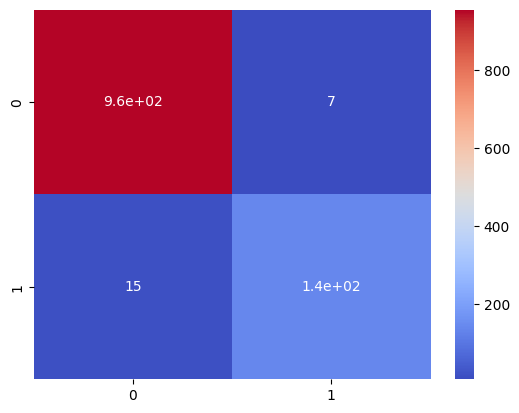

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap='coolwarm')

In [ ]:
data = ["click link"]
cv_data = cv.transform(data)
y_pred = model.predict(cv_data)
y_pred

array(['spam'], dtype='<U4')